## CNN(cifar10 dataset_RGB)

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


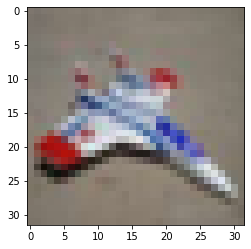

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

label = 0 #airplane
airplane_index = np.where(Y_train == label)[0]
airplane = X_train[airplane_index,:,:,:]
plt.imshow(np.reshape(airplane[1], (32,32,3)), cmap=plt.cm.Blues)

In [ ]:
from tensorflow.keras import utils

X_train = X_train[0:5000,:,:,:]
Y_train_con = Y_train[0:5000,:]
X_test = X_test[0:1000,:,:,:]
Y_test_con = Y_test[0:1000,:]

In [ ]:
Y_train = utils.to_categorical(Y_train_con)
Y_test = utils.to_categorical(Y_test_con)

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

print()

print(Y_test[0])

(5000, 32, 32, 3) (5000, 10)
(1000, 32, 32, 3) (1000, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
X_train = (X_train - 0)/255
X_test = (X_test - 0)/255
print(Y_train[0])
print(X_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.

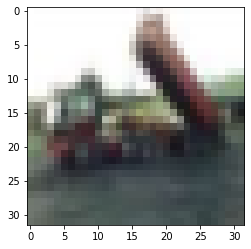

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 다시 (32,32,3)로 재배열 한 후 이미지로 띄우기
plt.imshow(np.reshape(X_train[2], (32, 32, 3)), cmap=plt.cm.Blues)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense, Flatten, Dropout, Reshape
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)              

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_history = model.fit(X_train, Y_train, batch_size=256, epochs=600, verbose=2, validation_data=(X_test, Y_test))

Epoch 1/600
20/20 - 9s - loss: 2.3124 - accuracy: 0.0796 - val_loss: 2.3148 - val_accuracy: 0.0770 - 9s/epoch - 475ms/step
Epoch 2/600
20/20 - 0s - loss: 2.3086 - accuracy: 0.0844 - val_loss: 2.3108 - val_accuracy: 0.0790 - 209ms/epoch - 10ms/step
Epoch 3/600
20/20 - 0s - loss: 2.3053 - accuracy: 0.0946 - val_loss: 2.3074 - val_accuracy: 0.0940 - 207ms/epoch - 10ms/step
Epoch 4/600
20/20 - 0s - loss: 2.3025 - accuracy: 0.1050 - val_loss: 2.3045 - val_accuracy: 0.1050 - 214ms/epoch - 11ms/step
Epoch 5/600
20/20 - 0s - loss: 2.3000 - accuracy: 0.1170 - val_loss: 2.3019 - val_accuracy: 0.1170 - 259ms/epoch - 13ms/step
Epoch 6/600
20/20 - 0s - loss: 2.2977 - accuracy: 0.1248 - val_loss: 2.2996 - val_accuracy: 0.1250 - 205ms/epoch - 10ms/step
Epoch 7/600
20/20 - 0s - loss: 2.2956 - accuracy: 0.1330 - val_loss: 2.2974 - val_accuracy: 0.1280 - 201ms/epoch - 10ms/step
Epoch 8/600
20/20 - 0s - loss: 2.2937 - accuracy: 0.1354 - val_loss: 2.2954 - val_accuracy: 0.1350 - 217ms/epoch - 11ms/step
Ep

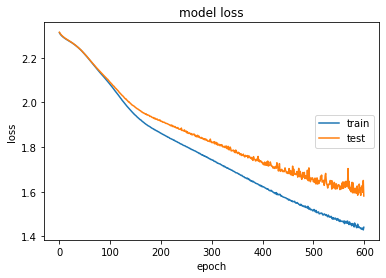

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

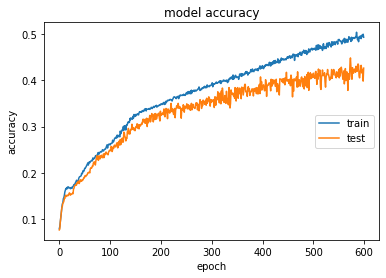

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

# 과대 적합!!!!

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(model_input, feature, label, class_info):
  pred=model_input.predict(feature)
  cnf_matrix = confusion_matrix(np.argmax(label, axis=1), np.argmax(pred, axis=1))
  plt.figure()
  plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
  tick_marks = np.arange(len(class_info))
  plt.xticks(tick_marks, class_info, rotation=45)
  plt.yticks(tick_marks, class_info)
  thresh = cnf_matrix.max()/2.

  for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j], horizontalalignment='center', color='white' if cnf_matrix[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  plt.show()

32/32 [==============================] - 0s 4ms/step


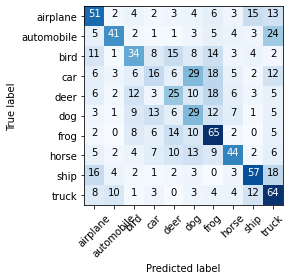

In [ ]:
class_info = ['airplane', 'automobile', 'bird', 'car', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_confusion_matrix(model, X_test, Y_test, class_info=class_info)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

data_augmentation = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(factor=0.2),
    layers.RandomZoom(height_factor=0.2, width_factor=0.2)
])

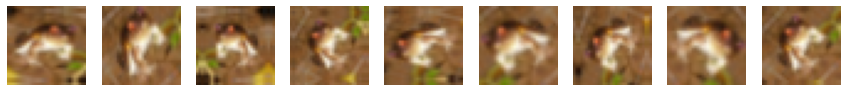

In [ ]:
plt.figure(figsize=(20,5))

for i in range(9):
  augmented_images = data_augmentation(X_train[0])
  ax = plt.subplot(3, 12, i+1)
  plt.imshow(augmented_images, cmap=plt.cm.Blues)
  plt.axis('off')

In [ ]:
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(X_train, Y_train, epochs=600, batch_size=100, verbose=2, validation_data=(X_test, Y_test), shuffle=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/600


50/50 - 4s - loss: 2.3142 - accuracy: 0.1076 - val_loss: 2.3067 - val_accuracy: 0.1100 - 4s/epoch - 79ms/step
Epoch 2/600
50/50 - 3s - loss: 2.3068 - accuracy: 0.1004 - val_loss: 2.3005 - val_accuracy: 0.1060 - 3s/epoch - 52ms/step
Epoch 3/600
50/50 - 3s - loss: 2.3028 - accuracy: 0.1004 - val_loss: 2.2965 - val_accuracy: 0.0880 - 3s/epoch - 52ms/step
Epoch 4/600
50/50 - 3s - loss: 2.2986 - accuracy: 0.0870 - val_loss: 2.2936 - val_accuracy: 0.0850 - 3s/epoch - 53ms/step
Epoch 5/600
50/50 - 3s - loss: 2.2952 - accuracy: 0.0920 - val_loss: 2.2911 - val_accuracy: 0.0910 - 3s/epoch - 55ms/step
Epoch 6/600
50/50 - 3s - loss: 2.2935 - accuracy: 0.0980 - val_loss: 2.2888 - val_accuracy: 0.1000 - 3s/epoch - 53ms/step
Epoch 7/600
50/50 - 3s - loss: 2.2919 - accuracy: 0.1068 - val_loss: 2.2867 - val_accuracy: 0.1050 - 3s/epoch - 54ms/step
Epoch 8/600
50/50 - 3s - loss: 2.2900 - accuracy: 0.1144 - val_loss: 2.2846 - val_accuracy: 0.1180 - 3s/epoch - 53ms/step
Epoch 9/600
50/50 - 3s - loss: 2.286

In [ ]:
cnn_score = model.evaluate(X_test, Y_test, verbose=0)

# [0] : loss, [1] : accuracy
print('\n', 'Test accuracy : ', cnn_score[1])


 Test accuracy :  0.4320000112056732


32/32 [==============================] - 0s 3ms/step


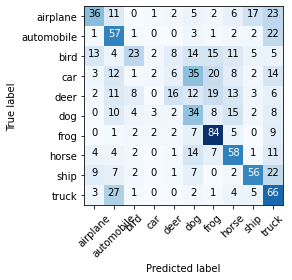

In [ ]:
class_info = ['airplane', 'automobile', 'bird', 'car', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_confusion_matrix(model, X_test, Y_test, class_info=class_info)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

data_augmentation = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(factor=0.2),
    layers.RandomZoom(height_factor=0.2, width_factor=0.2)
])

In [ ]:
from numpy.random import permutation

X_train_concat = np.concatenate((X_train, data_augmentation(X_train)), axis=0)
Y_train_concat = np.concatenate((Y_train, Y_train), axis=0)
perm = permutation(X_train_concat.shape[0])
X_train_concat = X_train_concat[perm,:,:,:]
Y_train_concat = Y_train_concat[perm,:]

In [ ]:
sgd = SGD(lr=0.001)
def CNN():
  model = Sequential()
  model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(32,32,3)))
  model.add(MaxPool2D((2, 2)))
  model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
  model.add(MaxPool2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

model = CNN()
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model_history = model.fit(X_train, Y_train, epochs=600, batch_size=100, verbose=2, validation_data=(X_test, Y_test), shuffle=True)

Epoch 1/600


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


50/50 - 1s - loss: 2.3080 - accuracy: 0.1144 - val_loss: 2.2955 - val_accuracy: 0.1460 - 787ms/epoch - 16ms/step
Epoch 2/600
50/50 - 0s - loss: 2.2969 - accuracy: 0.1278 - val_loss: 2.2886 - val_accuracy: 0.1500 - 257ms/epoch - 5ms/step
Epoch 3/600
50/50 - 0s - loss: 2.2898 - accuracy: 0.1292 - val_loss: 2.2828 - val_accuracy: 0.1450 - 293ms/epoch - 6ms/step
Epoch 4/600
50/50 - 0s - loss: 2.2839 - accuracy: 0.1342 - val_loss: 2.2775 - val_accuracy: 0.1450 - 284ms/epoch - 6ms/step
Epoch 5/600
50/50 - 0s - loss: 2.2786 - accuracy: 0.1398 - val_loss: 2.2725 - val_accuracy: 0.1570 - 253ms/epoch - 5ms/step
Epoch 6/600
50/50 - 0s - loss: 2.2734 - accuracy: 0.1496 - val_loss: 2.2676 - val_accuracy: 0.1580 - 258ms/epoch - 5ms/step
Epoch 7/600
50/50 - 0s - loss: 2.2683 - accuracy: 0.1516 - val_loss: 2.2623 - val_accuracy: 0.1790 - 249ms/epoch - 5ms/step
Epoch 8/600
50/50 - 0s - loss: 2.2631 - accuracy: 0.1614 - val_loss: 2.2574 - val_accuracy: 0.1820 - 251ms/epoch - 5ms/step
Epoch 9/600
50/50 -

In [ ]:
cnn_score = model.evaluate(X_test, Y_test, verbose=0)

# [0] : loss, [1] : accuracy
print('\n', 'Test accuracy : ', cnn_score[1])


 Test accuracy :  0.5210000276565552


32/32 [==============================] - 0s 4ms/step


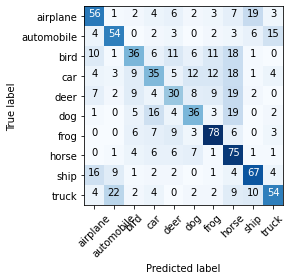

In [ ]:
class_info = ['airplane', 'automobile', 'bird', 'car', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_confusion_matrix(model, X_test, Y_test, class_info=class_info)

e